In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import CocoDetection
from pycocotools.coco import COCO
import torchvision.transforms as F 
# need ms coco api to get dataset
from pycocotools import mask as mask
import numpy as np
import matplotlib.pyplot as plt

In [53]:


coco_class = COCO(ann_file)

# define transform pipeline for data augmentation and normalization
transform = F.Compose([
    F.ToTensor(),
    F.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# create dataset object
coco_dataset = CocoDetection(root=data_dir,
                             annFile=ann_file,
                             transform=transform,
                             )


loading annotations into memory...
Done (t=17.98s)
creating index...
index created!
loading annotations into memory...
Done (t=17.65s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]]
51
{'segmentation': [[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]], 'area': 120057.13925, 'iscrowd': 0, 'image_id': 9, 'bbox': [1.08, 187.69, 611.59, 285.84], 'category_id': 51, 'id': 1038967}


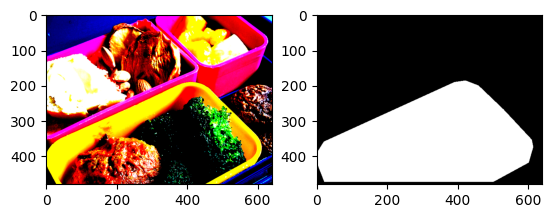

In [73]:

# retrieve segmentation masks for an image
image_idx = 0
image, target = coco_dataset[image_idx]


mask = torch.zeros_like(image)

for i in range(len(target)):
    print(target[i]["segmentation"])
    print(target[i]["category_id"])
    print(target[i])
    mask += coco_class.annToMask(ann=target[i])
    break

_, ax = plt.subplots(1, 2)

ax[0].imshow(image.permute(1, 2, 0))
ax[1].imshow(mask.permute(1, 2, 0))



In [17]:
import coco_dataset
import importlib
importlib.reload(coco_dataset)

# path to MS COCO dataset
data_dir = '/home/nfs/inf6/data/datasets/coco/train2017'

# initialize COCO API for segmentation
ann_file = '/home/nfs/inf6/data/datasets/coco/annotations/instances_train2017.json'

dataset = coco_dataset.Coco_Dataset(data_dir, ann_file)

loading annotations into memory...
Done (t=18.99s)
creating index...
index created!


In [18]:
dataset[0]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FBA51107AF0> [{'segmentation': [[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]], 'area': 120057.13925, 'iscrowd': 0, 'image_id': 9, 'bbox': [1.08, 187.69, 611.59, 285.84], 'category_id': 51, 'id': 1038967}, {'segmentation': [[357.03, 69.03, 311.73, 15.1, 550.11, 4.31, 631.01, 62.56, 629.93, 88.45, 595.42, 185.53, 513.44, 230.83, 488.63, 232.99, 437.93, 190.92, 429.3, 189.84, 434.7, 148.85, 410.97, 121.89, 359.19, 74.43, 358.11, 65.8]], 'area': 44434.751099999994, 'iscrowd': 0, 'image_id': 9, 'bbox': [311.73, 4.31, 319.28, 228.68], 'category_id': 51, 'id': 1039564}, {'segmentation': [[249.6, 348.99, 267.67, 311.72, 291.39, 294.78, 304.94, 294.78, 326.4, 283.48, 345.6, 273.32, 368.19, 269.93, 385.13, 268.8, 388.52, 257.51, 393.04, 250.73, 407.72, 240.56, 425.79, 230.4, 441.6, 229.27, 

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 {'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          ...,
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0,

In [ ]:
city_home = "/home/nfs/inf6/data/datasets/cityscapes"

cityscapes_train = torchvision.datasets.Cityscapes(root=city_home, split="train", mode="coarse", target_type="semantic")
cityscapes_test = torchvision.datasets.Cityscapes(root=city_home, split="train_extra", mode="coarse", target_type="semantic")
cityscapes_valid = torchvision.datasets.Cityscapes(root=city_home, split="val", mode="coarse", target_type="semantic")


In [12]:
print(len(cityscapes_train ))
print(len(cityscapes_valid ))
print(len(cityscapes_test ))

2975
19998
500
